In [4]:
from pathlib import Path
from os import listdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
save_fig_path = Path("plot_vitrage")

In [6]:
path_vit = r"resume_vitrage.xlsx"
df = pd.read_excel(path_vit, index_col=0)
df.head(2)

,fichier,archétypes,simp_vit_3CL,doub_vit_3CL,trip_vit_3CL,main_vit_3CL,main_vit_Danube,Danube_OK,somme
0,dpe_all3-len_1010-P1-I-HABITAT-FRANCE_BOIS_TUI...,['P1-I-HABITAT-FRANCE_BOIS_TUILE'],11.1,88.2,0.7,double vitrage,simple vitrage,False,100.0
1,dpe_all3-len_1074-P1-I-HABITAT-FRANCE_TERRE_TU...,['P1-I-HABITAT-FRANCE_TERRE_TUILE'],6.5,93.4,0.1,double vitrage,simple vitrage,False,100.0


### Plot all

In [7]:
def take_root(row):
    return "-".join(row['fichier'].split("-")[2:-1])
    
df["groupe"] = df.apply(lambda row: take_root(row), axis=1)
df.head(2)

,fichier,archétypes,simp_vit_3CL,doub_vit_3CL,trip_vit_3CL,main_vit_3CL,main_vit_Danube,Danube_OK,somme,groupe
0,dpe_all3-len_1010-P1-I-HABITAT-FRANCE_BOIS_TUI...,['P1-I-HABITAT-FRANCE_BOIS_TUILE'],11.1,88.2,0.7,double vitrage,simple vitrage,False,100.0,P1-I-HABITAT-FRANCE_BOIS_TUILE
1,dpe_all3-len_1074-P1-I-HABITAT-FRANCE_TERRE_TU...,['P1-I-HABITAT-FRANCE_TERRE_TUILE'],6.5,93.4,0.1,double vitrage,simple vitrage,False,100.0,P1-I-HABITAT-FRANCE_TERRE_TUILE


In [8]:
df.sort_values("groupe", ascending=False, inplace=True)
df.head(2)

,fichier,archétypes,simp_vit_3CL,doub_vit_3CL,trip_vit_3CL,main_vit_3CL,main_vit_Danube,Danube_OK,somme,groupe
24,dpe_all3-len_48162-P7-P-HABITAT-FRANCE-toit.csv,"['P7-P-HABITAT-FRANCE_ARDOISE', 'P7-P-HABITAT-...",3.9,94.8,1.3,double vitrage,double vitrage a isolation renforcee,True,100.0,P7-P-HABITAT-FRANCE
31,dpe_all3-len_9137-P7-I-HABITAT-FRANCE-toit.csv,"['P7-I-HABITAT-FRANCE_ARDOISE', 'P7-I-HABITAT-...",5.9,92.8,1.2,double vitrage,double vitrage a isolation renforcee,True,99.9,P7-I-HABITAT-FRANCE


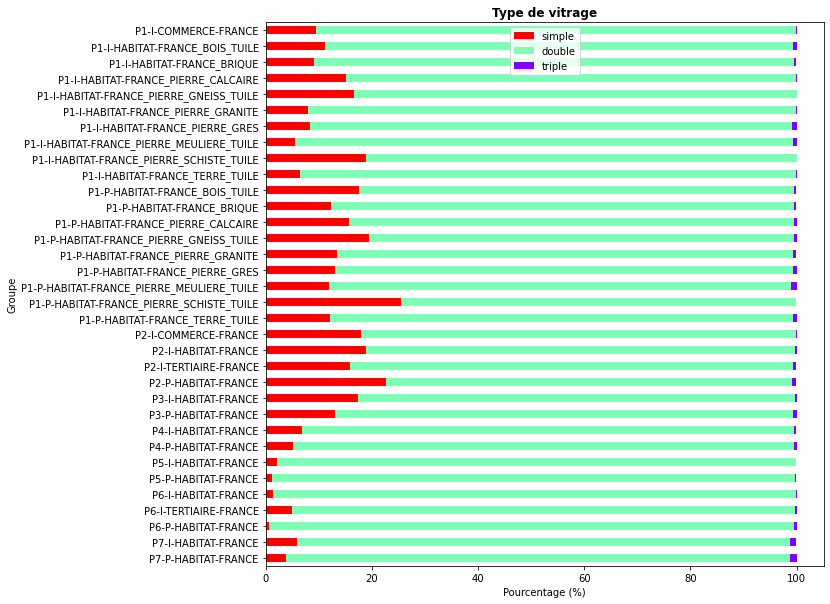

In [9]:
# Plot all
cols = ["groupe", "simp_vit_3CL", "doub_vit_3CL", "trip_vit_3CL"]

fig, ax = plt.subplots(figsize=(10,10))
df[cols].plot(x='groupe', kind='barh', stacked=True, ax=ax, colormap='rainbow_r')

plt.title("Type de vitrage",fontweight="bold")
plt.ylabel("Groupe")
plt.xlabel("Pourcentage (%)")
ax.legend(["simple", "double", "triple"],loc=9)
path_save_type_de_vitrage = save_fig_path /"Type_de_vitrage.png"
fig.savefig(path_save_type_de_vitrage,bbox_inches='tight')

### Separate the groupes habitat and others 

In [10]:
df_hab = df[df['fichier'].str.contains('HABITAT')]
df_ter_com = df[~df['fichier'].str.contains('HABITAT')]

In [11]:
df_ter_com

,fichier,archétypes,simp_vit_3CL,doub_vit_3CL,trip_vit_3CL,main_vit_3CL,main_vit_Danube,Danube_OK,somme,groupe
23,dpe_all3-len_364-P6-I-TERTIAIRE-FRANCE-nati.csv,['P6-I-TERTIAIRE-FRANCE'],4.9,94.8,0.3,double vitrage,double vitrage,True,100.0,P6-I-TERTIAIRE-FRANCE
20,dpe_all3-len_320-P2-I-TERTIAIRE-FRANCE-nati.csv,['P2-I-TERTIAIRE-FRANCE'],15.9,83.4,0.6,double vitrage,simple vitrage,False,99.9,P2-I-TERTIAIRE-FRANCE
30,dpe_all3-len_634-P2-I-COMMERCE-FRANCE-nati.csv,['P2-I-COMMERCE-FRANCE'],18.0,81.9,0.2,double vitrage,simple vitrage,False,100.1,P2-I-COMMERCE-FRANCE
32,dpe_all3-len_916-P1-I-COMMERCE-FRANCE-nati.csv,['P1-I-COMMERCE-FRANCE'],9.4,90.4,0.2,double vitrage,simple vitrage,False,100.0,P1-I-COMMERCE-FRANCE


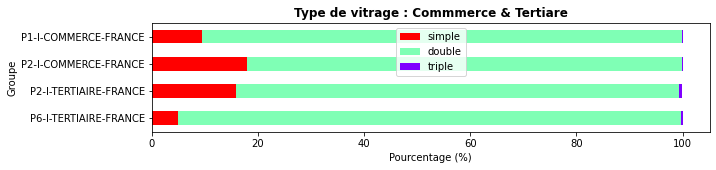

In [12]:
# Plot commerce & tertiare
cols = ["groupe", "simp_vit_3CL", "doub_vit_3CL", "trip_vit_3CL"]

fig_com, ax = plt.subplots(figsize=(10,2))
df_ter_com[cols].plot(x='groupe', kind='barh', stacked=True, ax=ax, colormap='rainbow_r',)

plt.title("Type de vitrage : Commmerce & Tertiare",fontweight="bold")
plt.ylabel("Groupe")
plt.xlabel("Pourcentage (%)")
ax.legend(["simple", "double", "triple"],loc=9)

path_save_vit_com_tert = save_fig_path /"Type_de_vitrage_com_tert.png"
fig_com.savefig(path_save_vit_com_tert,bbox_inches='tight')

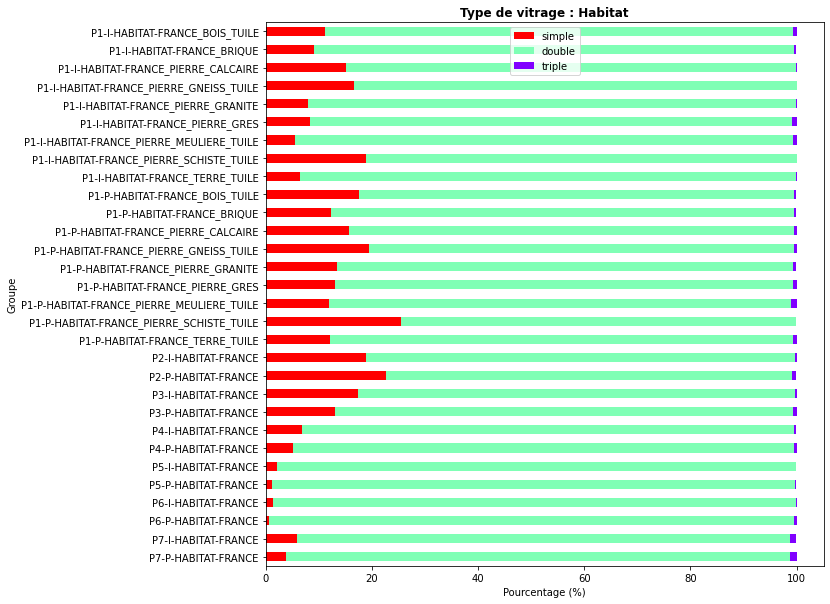

In [13]:
# Plot habitat
cols = ["groupe", "simp_vit_3CL", "doub_vit_3CL", "trip_vit_3CL"]

fig_hab, ax = plt.subplots(figsize=(10,10))
df_hab[cols].plot(x='groupe', kind='barh', stacked=True, ax=ax,
             colormap='rainbow_r',)
plt.title("Type de vitrage : Habitat",fontweight="bold")
plt.ylabel("Groupe")
plt.xlabel("Pourcentage (%)")
ax.legend(["simple", "double", "triple"],loc=9)

path_save_vit_habitat = save_fig_path /"Type_de_vitrage_habitat.png"
fig_hab.savefig(path_save_vit_habitat,bbox_inches='tight')